In [2]:
from google.colab import files
uploaded = files.upload()

#NOTE
#As the dataset is too large to be uploaded to Github, running the following code only works if the dataset is downloaded locally.
#The above commands allow for uploading a file from the user's machine for use in Google Colab.

#Dataset retrieved from NYC OpenData: https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh/about_data

Saving 2015_Street_Tree_Census_-_Tree_Data_20250409.csv to 2015_Street_Tree_Census_-_Tree_Data_20250409.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data_20250409.csv')

In [ ]:
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [ ]:
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [ ]:
#counting number of trees by borough

df.groupby(['borough'])['tree_id'].count()

,tree_id
borough,
Bronx,85203
Brooklyn,177293
Manhattan,65423
Queens,250551
Staten Island,105318


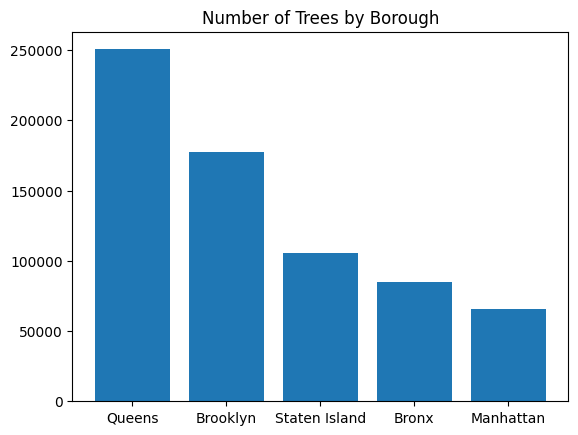

In [ ]:
#setting "count" variable for # of trees

counts = df['borough'].value_counts().sort_values(ascending=False)

#plotting chart

plt.bar(counts.index, counts.values)
plt.title('Number of Trees by Borough')
plt.show()

[Text(0, 0, '250551'),
 Text(0, 0, '177293'),
 Text(0, 0, '105318'),
 Text(0, 0, '85203'),
 Text(0, 0, '65423')]

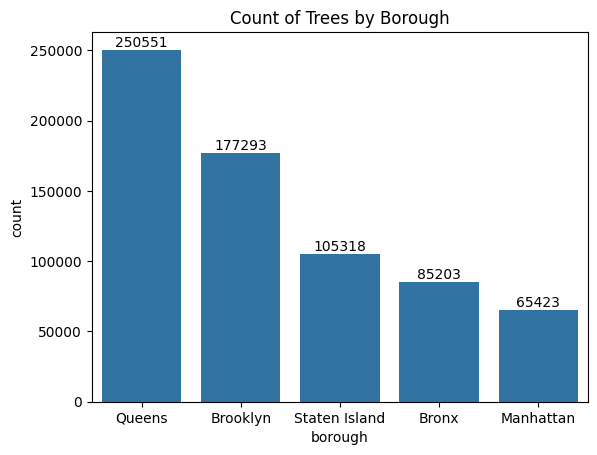

In [ ]:
#plotting in seaborn

ax = sns.countplot(data = df, x = 'borough', order = df['borough'].value_counts().index)
ax.set_title('Count of Trees by Borough')
ax.bar_label(container = ax.containers[0])


In [ ]:
#tree health by borough/dropping null values

df['health'].dropna()
df.groupby(['health'])['borough'].count()

,borough
health,
Fair,96504
Good,528850
Poor,26818


In [ ]:
#creating dataframe where trees are sorted/counted by health

health_counts = df.groupby(['borough', 'health']).size().unstack(fill_value = 0)
health_counts.head()


health,Fair,Good,Poor
borough,,,
Bronx,10887,66603,3095
Brooklyn,25073,138212,6459
Manhattan,11460,47358,3609
Queens,34549,194008,9417
Staten Island,14535,82669,4238


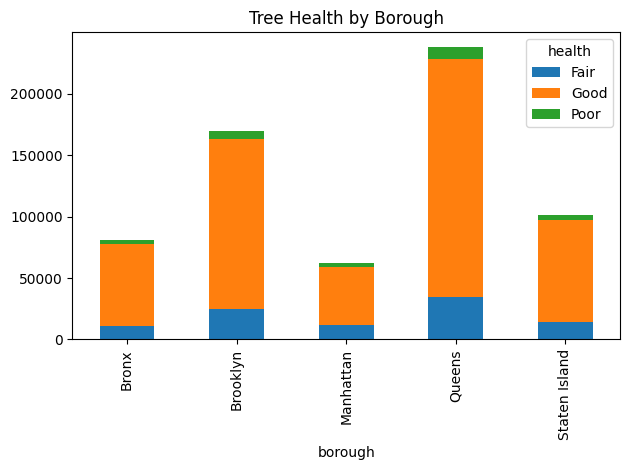

In [ ]:
#plotting

health_counts.plot(kind='bar', stacked=True)
plt.title('Tree Health by Borough')
plt.tight_layout()

plt.show()

In [ ]:
#dataframe for number of signs of stewardship/dropping N/A

df['steward'].dropna()
stew_counts = df.groupby(['borough', 'steward']).size().unstack(fill_value = 0)
stew_counts.head()

steward,1or2,3or4,4orMore
borough,,,
Bronx,14808,855,71
Brooklyn,43877,6050,533
Manhattan,24175,7817,554
Queens,41868,3065,340
Staten Island,18829,1396,112


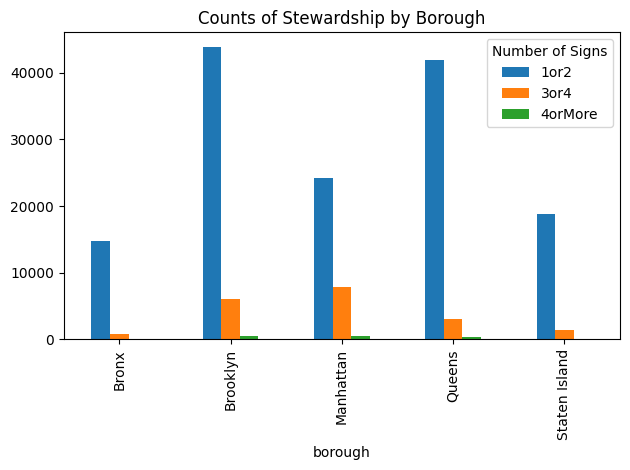

In [ ]:
#plotting

stew_counts.plot(kind='bar', stacked=False)
plt.title('Counts of Stewardship by Borough')
plt.legend(title='Number of Signs')
plt.tight_layout()

plt.show()

In [5]:
#code for data analysis

#counting total number of various problems with trees (across 5 boros)

#counting problems with the roots
rtstone = df['root_stone'].value_counts()
rtgrate = df['root_grate'].value_counts()
rtother = df['root_other'].value_counts()

#counting problems with the trunks
trnkwire = df['trunk_wire'].value_counts()
trnklight = df['trnk_light'].value_counts()
trnkother = df['trnk_other'].value_counts()

#counting problems with the branches
brnchlight = df['brch_light'].value_counts()
brnchshoe = df['brch_shoe'].value_counts()
brnchother = df['brch_other'].value_counts()

#testing

print(rtstone)

root_stone
No     543789
Yes    139999
Name: count, dtype: int64


In [16]:
#now counting problems by borough

#root problems by borough
rtstoneBoro = df.groupby('borough')['root_stone'].value_counts()
rtgrateBoro = df.groupby('borough')['root_grate'].value_counts()
rtotherBoro = df.groupby('borough')['root_other'].value_counts()

#trunk problems by borough
trnkwireBoro = df.groupby('borough')['trunk_wire'].value_counts()
trnklightBoro = df.groupby('borough')['trnk_light'].value_counts()
trnkotherBoro = df.groupby('borough')['trnk_other'].value_counts()

#branch problems by borough
brnchlightBoro = df.groupby('borough')['brch_light'].value_counts()
brnchshoeBoro = df.groupby('borough')['brch_shoe'].value_counts()
brnchotherBoro = df.groupby('borough')['brch_other'].value_counts()

#testing
print(brnchlightBoro)

borough        brch_light
Bronx          No             77092
               Yes             8111
Brooklyn       No            163978
               Yes            13315
Manhattan      No             64548
               Yes              875
Queens         No            219937
               Yes            30614
Staten Island  No             95868
               Yes             9450
Name: count, dtype: int64


In [15]:
#creating variables for only YES indicators by borough by issue

#bronx values
bxrtstone = rtstoneBoro[('Bronx', 'Yes')]
bxrtgrate = rtgrateBoro[('Bronx', 'Yes')]
bxrtother = rtotherBoro[('Bronx', 'Yes')]

bxtrnkwire = trnkwireBoro[('Bronx', 'Yes')]
bxtrnklight = trnklightBoro[('Bronx', 'Yes')]
bxtrnkother = trnkotherBoro[('Bronx', 'Yes')]

bxbrnchlight = brnchlightBoro[('Bronx', 'Yes')]
bxbrnchshoe = brnchshoeBoro[('Bronx', 'Yes')]
bxbrnchother = brnchotherBoro[('Bronx', 'Yes')]


#brooklyn values
bkrtstone = rtstoneBoro[('Brooklyn', 'Yes')]
bkrtgrate = rtgrateBoro[('Brooklyn', 'Yes')]
bkrtother = rtotherBoro[('Brooklyn', 'Yes')]

bktrnkwire = trnkwireBoro[('Brooklyn', 'Yes')]
bktrnklight = trnklightBoro[('Brooklyn', 'Yes')]
bktrnkother = trnkotherBoro[('Brooklyn', 'Yes')]

bkbrnchlight = brnchlightBoro[('Brooklyn', 'Yes')]
bkbrnchshoe = brnchshoeBoro[('Brooklyn', 'Yes')]
bkbrnchother = brnchotherBoro[('Brooklyn', 'Yes')]

#manhattan
manrtstone = rtstoneBoro[('Manhattan', 'Yes')]
manrtgrate = rtgrateBoro[('Manhattan', 'Yes')]
manrtother = rtotherBoro[('Manhattan', 'Yes')]

mantrnkwire = trnkwireBoro[('Manhattan', 'Yes')]
mantrnklight = trnklightBoro[('Manhattan', 'Yes')]
mantrnkother = trnkotherBoro[('Manhattan', 'Yes')]

manbrnchlight = brnchlightBoro[('Manhattan', 'Yes')]
manbrnchshoe = brnchshoeBoro[('Manhattan', 'Yes')]
manbrnchother = brnchotherBoro[('Manhattan', 'Yes')]

#queens
qnrtstone = rtstoneBoro[('Queens', 'Yes')]
qnrtgrate = rtgrateBoro[('Queens', 'Yes')]
qnrtother = rtotherBoro[('Queens', 'Yes')]

qntrnkwire = trnkwireBoro[('Queens', 'Yes')]
qntrnklight = trnklightBoro[('Queens', 'Yes')]
qntrnkother = trnkotherBoro[('Queens', 'Yes')]

qnbrnchlight = brnchlightBoro[('Queens', 'Yes')]
qnbrnchshoe = brnchshoeBoro[('Queens', 'Yes')]
qnbrnchother = brnchotherBoro[('Queens', 'Yes')]

#staten island
sirtstone = rtstoneBoro[('Staten Island', 'Yes')]
sirtgrate = rtgrateBoro[('Staten Island', 'Yes')]
sirtother = rtotherBoro[('Staten Island', 'Yes')]

sitrnkwire = trnkwireBoro[('Staten Island', 'Yes')]
sitrnklight = trnklightBoro[('Staten Island', 'Yes')]
sitrnkother = trnkotherBoro[('Staten Island', 'Yes')]

sibrnchlight = brnchlightBoro[('Staten Island', 'Yes')]
sibrnchshoe = brnchshoeBoro[('Staten Island', 'Yes')]
sibrnchother = brnchotherBoro[('Staten Island', 'Yes')]

#testing
print(bxrtstone)
print(bkbrnchlight)
print(qntrnkother)

16208
13315
10900


In [19]:
#calculating the total number of problems by borough

#number of tree problems identified in the bronx

bxtreeproblems = bxrtstone + bxrtgrate + bxrtother + bxtrnklight + bxtrnkwire + bxtrnkother + bxbrnchlight + bxbrnchshoe + bxbrnchother

#brooklyn
bktreeproblems = bkrtstone + bkrtgrate + bkrtother + bktrnklight + bktrnkwire + bktrnkother + bkbrnchlight + bkbrnchshoe + bkbrnchother

#manhattan
mantreeproblems = manrtstone + manrtgrate + manrtother + mantrnklight + mantrnkwire + mantrnkother + manbrnchlight + manbrnchshoe + manbrnchother

#queens
qntreeproblems = qnrtstone + qnrtgrate + qnrtother + qntrnklight + qntrnkwire + qntrnkother + qnbrnchlight + qnbrnchshoe + qnbrnchother

#staten island
sitreeproblems = sirtstone + sirtgrate + sirtother + sitrnklight + sitrnkwire + sitrnkother + sibrnchlight + sibrnchshoe + sibrnchother

#testing
print(bxtreeproblems)

35975


In [30]:
#calculating the number of issues per tree in each borough to allow for comparison across the entirety of NYC (trees per borough count pulled from [5] above)

#bronx
bxprobpertree = bxtreeproblems / 85203

#brooklyn
bkprobpertree = bktreeproblems / 177293

#manhattan
manprobpertree = mantreeproblems / 65423

#queens
qnprobpertree = qntreeproblems / 250551

#staten island
siprobpertree = sitreeproblems / 105318

#testing
print(round(bxprobpertree, 2))

0.42


In [36]:
#displaying the total number of problems in each boro

print(bxtreeproblems, 'tree problems were surveyed in The Bronx')
print(bktreeproblems, 'tree problems were surveyed in Brooklyn')
print(qntreeproblems, 'tree problems were surveyed in Queens')
print(mantreeproblems, 'tree problems were surveyed in Manhattan')
print(sitreeproblems, 'tree problems were surveyed in Staten Island')

print('\n')

#displaying the average number of issues witnessed per tree by borough

print(round(bxprobpertree, 2), 'issues per tree were identified in The Bronx')
print(round(bkprobpertree, 2), 'issues per tree were identified in Brooklyn')
print(round(manprobpertree, 2), 'issues per tree were identified in Manhattan')
print(round(qnprobpertree, 2), 'issues per tree were identified in Queens')
print(round(siprobpertree, 2), 'issues per tree were identified in Staten Island')

35975 tree problems were surveyed in The Bronx
95112 tree problems were surveyed in Brooklyn
117581 tree problems were surveyed in Queens
34403 tree problems were surveyed in Manhattan
24795 tree problems were surveyed in Staten Island


0.42 issues per tree were identified in The Bronx
0.54 issues per tree were identified in Brooklyn
0.53 issues per tree were identified in Manhattan
0.47 issues per tree were identified in Queens
0.24 issues per tree were identified in Staten Island


This project is very important to me as a New Yorker. I very much enjoy walking around, especially with the weather starting to get nicer, and it is always lovely to see healthy and happy plantlife. My neighborhood is especially shady, with large trees covering every block. I think that being able to work with a dataset which surveys the trees of NYC, with my focus on the health of these trees, can allow for decision making and planning on the part of the Parks Department. Locating boroughs which have a high number of tree problems or issues per tree can help point towards where to accommodate resources and energy.